#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Import data

Source: https://www.kaggle.com/datasets/philiphyde1/nfl-stats-1999-2022?select=offense_weekly_data.csv

In [2]:
# Load data and view first five rows
data = pd.read_csv("offense_weekly_data.csv", parse_dates=["birth_date"])
data.head()

,id,name,position,team,season,week,season_type,opponent_team,completions,attempts,...,round,overall,forty,bench,vertical,index,offense_snaps,teams_offense_snaps,offense_pct,years_played
0,1045,A.J. Brown,WR,TEN,2019,1,REG,CLE,0,0,...,2.0,51.0,4.49,19.0,36.5,237.0,25.0,60.0,0.42,1.0
1,1045,A.J. Brown,WR,TEN,2019,2,REG,IND,0,0,...,2.0,51.0,4.49,19.0,36.5,2254.0,27.0,59.0,0.46,1.0
2,1045,A.J. Brown,WR,TEN,2019,3,REG,JAX,0,0,...,2.0,51.0,4.49,19.0,36.5,2920.0,39.0,80.0,0.49,1.0
3,1045,A.J. Brown,WR,TEN,2019,4,REG,ATL,0,0,...,2.0,51.0,4.49,19.0,36.5,4433.0,26.0,62.0,0.42,1.0
4,1045,A.J. Brown,WR,TEN,2019,5,REG,BUF,0,0,...,2.0,51.0,4.49,19.0,36.5,6346.0,37.0,58.0,0.64,1.0


#### Analysis

In [3]:
# Number of rows, columns
data.shape

(55014, 73)

In [4]:
# Data types for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55014 entries, 0 to 55013
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           55014 non-null  int64         
 1   name                         55014 non-null  object        
 2   position                     55014 non-null  object        
 3   team                         55014 non-null  object        
 4   season                       55014 non-null  int64         
 5   week                         55014 non-null  int64         
 6   season_type                  55014 non-null  object        
 7   opponent_team                55014 non-null  object        
 8   completions                  55014 non-null  int64         
 9   attempts                     55014 non-null  int64         
 10  passing_yards                55014 non-null  float64       
 11  passing_tds                  55014 non-nu

In [5]:
# All Wide Receivers
wr_all = data[data["position"] == "WR"].reset_index()
wr_all.drop("level_0", axis=1, inplace=True)
wr_all.head()

,id,name,position,team,season,week,season_type,opponent_team,completions,attempts,...,round,overall,forty,bench,vertical,index,offense_snaps,teams_offense_snaps,offense_pct,years_played
0,1045,A.J. Brown,WR,TEN,2019,1,REG,CLE,0,0,...,2.0,51.0,4.49,19.0,36.5,237.0,25.0,60.0,0.42,1.0
1,1045,A.J. Brown,WR,TEN,2019,2,REG,IND,0,0,...,2.0,51.0,4.49,19.0,36.5,2254.0,27.0,59.0,0.46,1.0
2,1045,A.J. Brown,WR,TEN,2019,3,REG,JAX,0,0,...,2.0,51.0,4.49,19.0,36.5,2920.0,39.0,80.0,0.49,1.0
3,1045,A.J. Brown,WR,TEN,2019,4,REG,ATL,0,0,...,2.0,51.0,4.49,19.0,36.5,4433.0,26.0,62.0,0.42,1.0
4,1045,A.J. Brown,WR,TEN,2019,5,REG,BUF,0,0,...,2.0,51.0,4.49,19.0,36.5,6346.0,37.0,58.0,0.64,1.0


#### Season stats

In [15]:
# 2023 season stats for wide receivers
seasons_to_filter = [2023]
season_2022_2023_wr = data[(data["season"].isin(seasons_to_filter)) & (data["position"] == "WR")]
season_2022_2023_wr.shape

(2220, 73)

In [16]:
# Select wide receiver stats for 2023 season
agg_wr_2023 = season_2023_wr.groupby("name")\
[["receptions", "receiving_yards", "receiving_tds", "fantasy_points"]]\
.agg({"receptions":"mean", 
      "receiving_yards":"mean", 
      "receiving_tds":"sum", 
      "fantasy_points":"mean"})\
.rename(columns={"receiving_yards":"avg_receiving_yards", 
                 "fantasy_points":"avg_fantasy_points", 
                 "receptions" : "avg_receptions",
                 "receiving_tds" : "total_receiving_tds"}).round(1)

agg_wr_2023.head()

,avg_receptions,avg_receiving_yards,total_receiving_tds,avg_fantasy_points
name,,,,
A.J. Brown,6.2,85.6,7,10.8
A.T. Perry,1.5,30.8,4,6.1
Adam Thielen,6.1,59.6,4,7.5
Alec Pierce,1.9,30.2,2,3.7
Alex Erickson,2.0,29.0,1,3.6


In [19]:
# Sort table
agg_wr_2023.sort_values(by=["total_receiving_tds", "avg_receiving_yards"], ascending=[False, False]).head()

,avg_receptions,avg_receiving_yards,total_receiving_tds,avg_fantasy_points
name,,,,
Tyreek Hill,7.4,112.4,13,16.1
Mike Evans,4.6,73.8,13,12.0
CeeDee Lamb,7.9,102.9,12,15.9
Amon-Ra St. Brown,7.4,94.7,10,13.2
Jordan Addison,4.1,53.6,10,8.9


#### Visualization

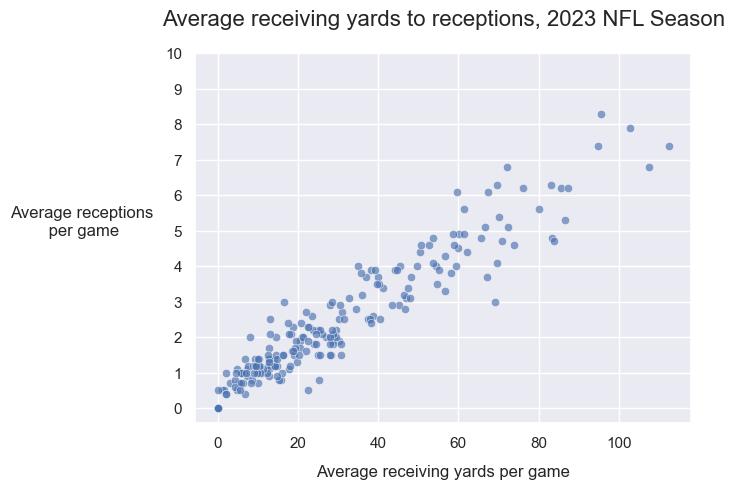

In [20]:
sns.scatterplot(agg_wr_2023, x="avg_receiving_yards", y="avg_receptions", alpha=0.65)
plt.xticks(np.arange(0, 120, 20))
plt.xlabel("Average receiving yards per game", labelpad=10, fontsize=12)
plt.yticks(np.arange(0, 11))
plt.ylabel("Average receptions\n per game", labelpad=60, rotation=0, fontsize=12)
plt.title("Average receiving yards to receptions, 2023 NFL Season", fontsize=16, pad=20)
plt.show()

#### Look for Multicollinearity

In [21]:
#cols_to_test = wr_all.iloc[:, np.r_[28:39, 42]]
cols_to_test = season_2023_wr.iloc[:, np.r_[30, 31, 32, 33, 37, 44, 52]]

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = cols_to_test.columns
vif["VIF"] = [variance_inflation_factor(cols_to_test.values, i) for i in range(cols_to_test.shape[1])]

vif

,features,VIF
0,receiving_yards,1.745943
1,receiving_tds,3.510184
2,receiving_fumbles,2.255161
3,receiving_fumbles_lost,2.165075
4,receiving_2pt_conversions,1.016536
5,ypc,1.021742
6,rec_td_percentage,2.563931


#### Regression

In [22]:
# For newer versions of Python/Jupyter, change default so that method config attributes always show
from sklearn import set_config
set_config(print_changed_only=False, display='diagram')

In [23]:
# Select features
x = season_2023_wr[["receiving_yards", "receiving_tds", 
                    "receiving_fumbles", "receiving_fumbles_lost", 
                    "receiving_2pt_conversions", "ypc", "rec_td_percentage"]]
y = season_2023_wr["fantasy_points"]

In [24]:
# Divide data into training and testing.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=20)

In [25]:
# Scale and transform
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [26]:
# Run linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, positive=False)

In [27]:
# R-Squared
r2 = lin_reg.score(x_train, y_train).round(3)
r2

0.981

In [28]:
# Adjusted R-Squared
def adjusted_r2(r2, n, p):
    result = 1 - (1 - r2) * (n - 1)/(n - p - 1)
    return result.round(3)

n = x.shape[0]
p = x.shape[1]


adjusted_r2(r2, n, p)

0.981

In [30]:
# Bias
lin_reg.intercept_.round(2)

5.27

In [31]:
# Extract p-values
from sklearn.feature_selection import f_regression
p_values = f_regression(x,y)[1]
p_values.round(3)

array([0.   , 0.   , 0.   , 0.719, 0.   , 0.   , 0.   ])

In [32]:
# Summary table of p-values and respective weights
reg_summary = pd.DataFrame(data=x.columns, columns=["Feature Name"])
reg_summary["p-value"] = p_values.round(3)
reg_summary["Weight"] = lin_reg.coef_
reg_summary

,Feature Name,p-value,Weight
0,receiving_yards,0.000,3.819528
1,receiving_tds,0.000,2.861423
2,receiving_fumbles,0.000,0.056697
3,receiving_fumbles_lost,0.719,-0.330367
4,receiving_2pt_conversions,0.000,0.202784
5,ypc,0.000,0.608021
6,rec_td_percentage,0.000,0.002558


In [33]:
# Predict based on test data set
y_pred = lin_reg.predict(x_test)

In [34]:
# Summary of results for actual vs. predicted
reg_pred_results = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
reg_pred_results.head(20)

,Actual,Predicted
52328,0.0,-0.076183
2428,0.0,-0.076183
8577,0.5,0.440616
43334,0.7,0.647335
11875,12.6,13.712423
12379,19.1,20.428578
28726,0.9,0.854055
25230,5.1,5.195168
36034,2.4,2.404452
24081,2.4,2.404452
